In [ ]:
import numpy as np
X = 2 * np.random.rand(100, 1) #All of our instances (one feature )
y = 4 + 3 * X + np.random.rand(100,1) #our labels


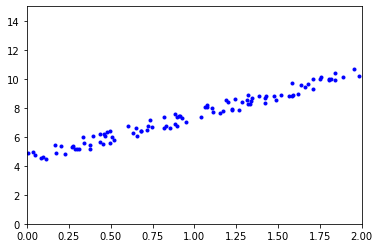

In [ ]:
from matplotlib import pyplot as plt
plt.plot(X, y, "b." ) 
plt.axis([0,2,0,15])
plt.show()


In [ ]:
X_b = np.c_[np.ones((100,1)), X] #add x0 = 1 to each instance, this is our bias
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best #parameters that better fit for our linear model


array([[4.50132317],
       [2.9939651 ]])

In [ ]:
#Let's do some predictions with our parameters
X_new = np.array([[0], [2]]) #New instances
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict 

array([[ 4.50132317],
       [10.48925337]])

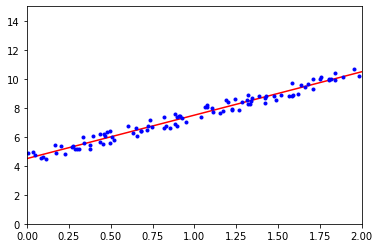

In [ ]:
#Let's plot the model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [ ]:
#Now let's use scikit learn to preform a linear regression model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
linear_regressor.coef_, linear_regressor.intercept_
linear_regressor.predict(X_new)

array([[ 4.50132317],
       [10.48925337]])

In [ ]:

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond= 1e-6)
theta_best_svd 

array([[4.50132317],
       [2.9939651 ]])

In [ ]:
np.linalg.pinv(X_b).dot(y)
np.linalg.svd(X_b)

(array([[-5.07725840e-02, -1.80831446e-01, -9.73515651e-02, ...,
         -9.50206480e-02, -9.68996917e-02, -1.06866936e-01],
        [-6.94379350e-02, -1.17759043e-01,  3.95821171e-02, ...,
          8.24197898e-02,  4.78866614e-02, -1.35291698e-01],
        [-1.05531348e-01,  4.20481842e-03,  9.88975432e-01, ...,
         -1.27264025e-02, -1.13544868e-02, -4.07726434e-03],
        ...,
        [-1.17627267e-01,  4.50783441e-02, -1.29383041e-02, ...,
          9.83675561e-01, -1.35947428e-02,  8.84724562e-04],
        [-1.07876272e-01,  1.21285917e-02, -1.13955662e-02, ...,
         -1.34239207e-02,  9.88211215e-01, -3.11532934e-03],
        [-5.61528585e-02, -1.62650870e-01, -3.21223058e-03, ...,
          1.96165988e-03, -2.20921618e-03,  9.75666688e-01]]),
 array([14.47758929,  3.78757402]),
 array([[-0.66232874, -0.74921335],
        [-0.74921335,  0.66232874]]))

# **Batch Gradient Descent ** 

In [ ]:
eta = 0.1 #Learning rate
n_iterations = 1000
m = 100 #Number of instances
X_b #Train set (with the bias parameter (x0 = 1))
 
thetas = np.random.rand(2,1) #Random values for thetas

for iterations in range(n_iterations):
  gradients = 2 /m * X_b.T.dot(X_b.dot(thetas) - y) #compute gradient vector
  thetas = thetas - eta*gradients #compute the new thetas

thetas

array([[4.50132317],
       [2.9939651 ]])